In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Import Dataset
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [33]:
#converting the type of Invoice Date Field from string to datetime --------> to_datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [34]:
#creating YearMonth field for the ease of reporting and visualization -------> For Exampl 201106
data['MY_invoiceYearMonth'] = data['InvoiceDate'].map(lambda date : 100*date.year + date.month)

In [35]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns -------> Revenue for each Month
data['MY_Revenue'] = data['UnitPrice'] * data['Quantity']


In [36]:
#Grouped base on Year and Month fo sum Revenue 
tx_revenue = data.groupby(['MY_invoiceYearMonth'])['MY_Revenue'].sum().reset_index()
tx_revenue


,MY_invoiceYearMonth,MY_Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


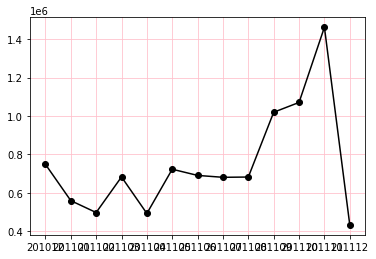

In [37]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs

plt.figure()
plt.plot(tx_revenue['MY_invoiceYearMonth'].to_numpy(dtype = str), tx_revenue['MY_Revenue'], marker='o',c = 'black')
plt.grid(c="pink")

In [38]:
#using pct_change() function to see monthly percentage change
tx_revenue ['MY_MonthlyGrowth'] = tx_revenue['MY_Revenue'].pct_change()
tx_revenue.head( )

,MY_invoiceYearMonth,MY_Revenue,MY_MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


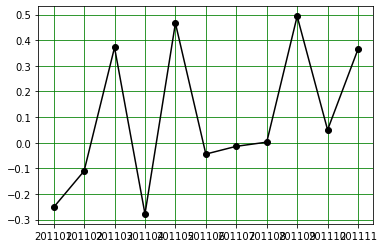

In [39]:
#Draw Plot for monthly percentage GROW befor 201112
plt.figure()
plt.grid(c="green")
plt.plot(tx_revenue.query("MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype = str), tx_revenue.query("MY_invoiceYearMonth < 201112")['MY_MonthlyGrowth'] , marker='o', c = 'black' )


<BarContainer object of 13 artists>

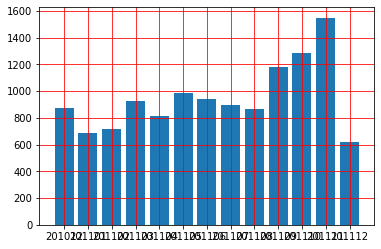

In [40]:
#creating a new dataframe with UK customers only
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_uk.groupby('MY_invoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
tx_monthly_active.head()
plt.figure()
plt.grid(c="red")
plt.bar(tx_monthly_active['MY_invoiceYearMonth'].to_numpy(dtype=str),tx_monthly_active['CustomerID'])

<BarContainer object of 13 artists>

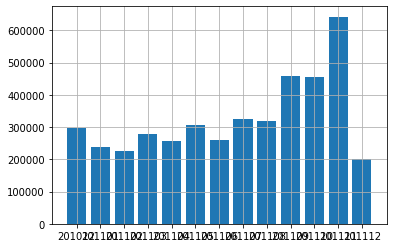

In [41]:
#create a new dataframe for no. of order by using quantity field (Tedad sefareshat)
tx_monthly_sales = tx_uk.groupby('MY_invoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_sales.head()
plt.figure()
plt.grid()
plt.bar(tx_monthly_sales['MY_invoiceYearMonth'].to_numpy(dtype=str),tx_monthly_sales['Quantity'])

In [42]:
#create a dataframe contaning CustomerID and FIRST PURCHASE DATE
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()

#Define Column name
tx_min_purchase.columns = ['CustomerID','MinPurcheseDate']

#creating YearMonth field for the ease of reporting and visualization -------> For Exampl 201106
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurcheseDate'].map(lambda date: 100*date.year + date.month)

tx_min_purchase.head(10)


,CustomerID,MinPurcheseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
5,12821.0,2011-05-09 15:51:00,201105
6,12822.0,2011-09-13 13:46:00,201109
7,12823.0,2011-02-16 12:15:00,201102
8,12824.0,2011-10-11 12:49:00,201110
9,12826.0,2010-12-09 15:21:00,201012


In [43]:
#merge first purchase date column to our main dataframe (tx_uk) (Bar Hasb Klide CustomerID)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MY_invoiceYearMonth,MY_Revenue,MinPurcheseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [44]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['MY_UserType'] = 'New'
tx_uk.loc[tx_uk['MY_invoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'MY_UserType'] = 'Existing'
tx_uk.head(400)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MY_invoiceYearMonth,MY_Revenue,MinPurcheseDate,MinPurchaseYearMonth,MY_UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,551846,22423,REGENCY CAKESTAND 3 TIER,2,2011-05-04 14:11:00,12.75,13047.0,United Kingdom,201105,25.50,2010-12-01 08:34:00,201012,Existing
396,551846,47566,PARTY BUNTING,10,2011-05-04 14:11:00,4.95,13047.0,United Kingdom,201105,49.50,2010-12-01 08:34:00,201012,Existing
397,551846,21621,VINTAGE UNION JACK BUNTING,8,2011-05-04 14:11:00,8.50,13047.0,United Kingdom,201105,68.00,2010-12-01 08:34:00,201012,Existing
398,C556920,21658,GLASS BEURRE DISH,-1,2011-06-15 13:49:00,3.95,13047.0,United Kingdom,201106,-3.95,2010-12-01 08:34:00,201012,Existing


In [45]:
#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['MY_invoiceYearMonth','MY_UserType'])['MY_Revenue'].sum().reset_index()

#filtering the dates and plot the result for date befor and after in dataset
tx_user_type_revenue = tx_user_type_revenue.query("MY_invoiceYearMonth != 201012 and MY_invoiceYearMonth != 201112")

tx_user_type_revenue.head()

,MY_invoiceYearMonth,MY_UserType,MY_Revenue
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00
5,201103,Existing,296350.03


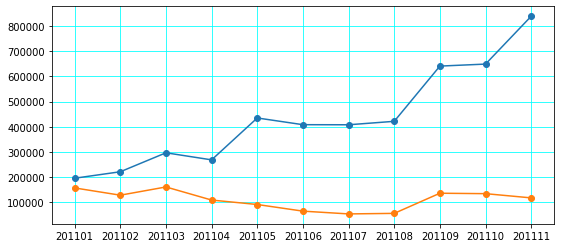

In [46]:
plt.figure(figsize=(9,4))
plt.grid(c='cyan')
plt.plot(tx_user_type_revenue.query("MY_UserType=='Existing'")['MY_invoiceYearMonth'].to_numpy(dtype=str) ,tx_user_type_revenue.query("MY_UserType=='Existing'")['MY_Revenue'] ,marker="o")
plt.plot(tx_user_type_revenue.query("MY_UserType=='New'")['MY_invoiceYearMonth'].to_numpy(dtype=str) ,tx_user_type_revenue.query("MY_UserType=='New'")['MY_Revenue'] ,marker="o")

<BarContainer object of 10 artists>

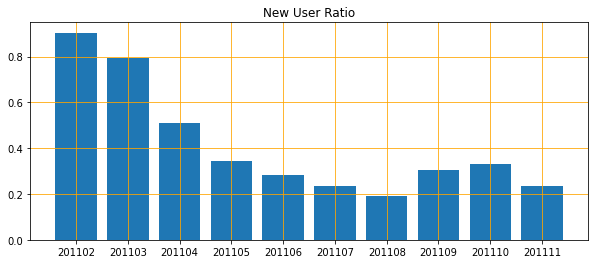

In [47]:
#create a dataframe that shows NEW USER RATIO - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("MY_UserType == 'New'").groupby(['MY_invoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("MY_UserType == 'Existing'").groupby(['MY_invoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio.head()

plt.figure(figsize=(10,4))
plt.title('New User Ratio')
plt.grid(c="orange")
plt.bar(tx_user_ratio.query("MY_invoiceYearMonth > 201101 and MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype=str),tx_user_ratio.query("MY_invoiceYearMonth > 201101 and MY_invoiceYearMonth < 201112")['CustomerID'])


In [48]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','MY_invoiceYearMonth'])['MY_Revenue'].sum().reset_index()

#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['MY_invoiceYearMonth']).reset_index()
tx_retention.head()

MY_invoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [55]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['MY_invoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [56]:
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

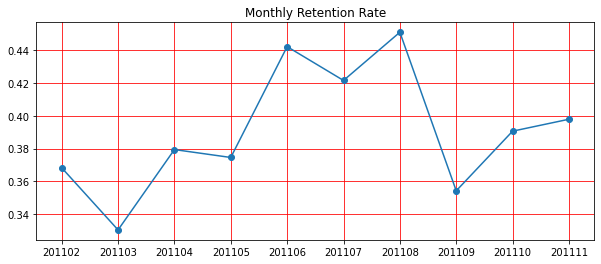

In [59]:
plt.figure(figsize=(10,4))
plt.title('Monthly Retention Rate')
plt.grid(c = 'red')
plt.plot(tx_retention.query("MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype=str),tx_retention.query("MY_invoiceYearMonth < 201112")['RetentionRate'] , marker='o')


months = tx_retention.columns[2:]
